# Modelo para a espécie Spring Peeper

## Limpando dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [25]:
base = pd.read_csv("springPeeperCorre.csv")

In [26]:
base.drop("id",axis=1,inplace=True)
base

,date,lat,lng,tornado,monthtodatesnowfalli,thunder,meantempi,snow,meanvism,meanwdire,...,meanwdird,meandewpti,meanvisi,maxhumidity,snowdepthi,mintempm,since1julsnowfalli,maxtempi,maxdewpti,mindewpti
0,20110410,49.179740,-122.469771,0.0,NaN,0.0,47.0,0.0,NaN,NE,...,46.0,43.0,NaN,97.0,NaN,6.0,NaN,51.0,44.0,42.0
1,20060404,49.781947,-123.133869,0.0,NaN,0.0,52.0,0.0,NaN,NW,...,326.0,43.0,NaN,100.0,NaN,4.0,NaN,63.0,48.0,38.0
2,20040402,49.781947,-123.133869,0.0,NaN,0.0,50.0,0.0,NaN,North,...,4.0,32.0,NaN,96.0,NaN,0.0,NaN,69.0,39.0,25.0
3,20050410,49.781947,-123.133869,0.0,NaN,0.0,42.0,0.0,NaN,NE,...,52.0,39.0,NaN,100.0,NaN,2.0,NaN,49.0,43.0,35.0
4,20110413,49.179740,-122.469771,0.0,NaN,0.0,45.0,0.0,NaN,NE,...,41.0,40.0,NaN,94.0,NaN,4.0,NaN,50.0,43.0,38.0
5,20110415,49.179740,-122.469771,0.0,NaN,0.0,41.0,0.0,NaN,NE,...,44.0,33.0,NaN,100.0,NaN,-1.0,NaN,52.0,39.0,26.0
6,20110423,49.179740,-122.469771,0.0,NaN,0.0,48.0,0.0,NaN,WNW,...,289.0,32.0,NaN,98.0,NaN,0.0,NaN,65.0,37.0,25.0
7,20110410,49.179740,-122.469771,0.0,NaN,0.0,47.0,0.0,NaN,NE,...,46.0,43.0,NaN,97.0,NaN,6.0,NaN,51.0,44.0,42.0
8,20110412,49.179740,-122.469771,0.0,NaN,0.0,44.0,0.0,NaN,East,...,83.0,34.0,NaN,96.0,NaN,1.0,NaN,55.0,39.0,29.0
9,20050712,46.271586,-62.853739,0.0,NaN,0.0,57.0,0.0,12.6,North,...,11.0,56.0,7.9,100.0,NaN,13.0,NaN,59.0,57.0,55.0


In [27]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6310 entries, 0 to 6309
Data columns (total 72 columns):
date                                  6310 non-null int64
lat                                   6310 non-null float64
lng                                   6310 non-null float64
tornado                               5722 non-null float64
monthtodatesnowfalli                  9 non-null float64
thunder                               5722 non-null float64
meantempi                             5647 non-null float64
snow                                  5722 non-null float64
meanvism                              2615 non-null float64
meanwdire                             5513 non-null object
minhumidity                           5640 non-null float64
maxvism                               2615 non-null float64
since1jancoolingdegreedays            25 non-null float64
coolingdegreedays                     5647 non-null float64
maxdewptm                             5640 non-null float64
m

In [28]:
zeros = []
for c in base.columns:
    if (base[c].dtype != 'object' and base[c].mean() == 0):
        base.drop(c,axis=1,inplace=True)
        zeros.append(c)
zeros

['tornado']

In [29]:
# Features com poucos dados
pouco = []
for c in base.columns:
    if (base[c].count() < 2700):
        pouco.append(c)
        base.drop(c,axis=1,inplace=True)
pouco

['monthtodatesnowfalli',
 'meanvism',
 'maxvism',
 'since1jancoolingdegreedays',
 'monthtodatecoolingdegreedays',
 'since1sepheatingdegreedays',
 'since1julsnowfallm',
 'monthtodatesnowfallm',
 'since1sepcoolingdegreedaysnormal',
 'monthtodateheatingdegreedaysnormal',
 'snowfallm',
 'since1julheatingdegreedays',
 'coolingdegreedaysnormal',
 'minvisi',
 'since1sepheatingdegreedaysnormal',
 'since1julheatingdegreedaysnormal',
 'snowfalli',
 'monthtodateheatingdegreedays',
 'monthtodatecoolingdegreedaysnormal',
 'since1sepcoolingdegreedays',
 'minvism',
 'maxvisi',
 'heatingdegreedaysnormal',
 'since1jancoolingdegreedaysnormal',
 'snowdepthm',
 'meanvisi',
 'snowdepthi',
 'since1julsnowfalli']

In [30]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6310 entries, 0 to 6309
Data columns (total 43 columns):
date                 6310 non-null int64
lat                  6310 non-null float64
lng                  6310 non-null float64
thunder              5722 non-null float64
meantempi            5647 non-null float64
snow                 5722 non-null float64
meanwdire            5513 non-null object
minhumidity          5640 non-null float64
coolingdegreedays    5647 non-null float64
maxdewptm            5640 non-null float64
precipi              5722 non-null object
heatingdegreedays    5647 non-null float64
meanpressurem        5395 non-null float64
precipsource         5513 non-null object
rain                 5722 non-null float64
minwspdm             5601 non-null float64
meanwindspdi         5601 non-null float64
fog                  5722 non-null float64
humidity             5422 non-null float64
minwspdi             5601 non-null float64
meanpressurei        5395 non-null flo

In [31]:
base.describe()

,date,lat,lng,thunder,meantempi,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
count,6.310000e+03,6310.000000,6310.000000,5722.000000,5647.000000,5722.000000,5640.000000,5647.000000,5640.000000,5647.000000,...,5647.000000,5395.000000,5395.000000,5722.000000,5640.000000,5640.000000,5647.000000,5647.000000,5640.000000,5640.000000
mean,2.008809e+07,45.015652,-77.853286,0.028137,50.452807,0.024642,42.399468,0.306534,7.400000,14.862051,...,10.252701,30.092999,29.907527,129.672492,39.689539,88.487234,4.390119,61.486099,45.336170,33.794149
std,4.632680e+04,1.354923,5.739577,0.165379,10.691576,0.155044,20.650964,1.370996,6.611688,10.181801,...,5.868231,0.198451,0.222245,120.069756,11.859401,12.207689,5.744001,12.637418,11.888832,12.372062
min,1.996042e+07,42.435620,-123.133869,0.000000,-16.000000,0.000000,4.000000,0.000000,-22.000000,0.000000,...,-26.000000,29.370000,29.020000,-1.000000,-23.000000,22.000000,-35.000000,0.000000,-7.000000,-38.000000
25%,2.005043e+07,44.100000,-79.812222,0.000000,44.000000,0.000000,26.000000,0.000000,3.000000,7.000000,...,6.000000,29.960000,29.760000,-1.000000,32.000000,82.000000,1.000000,53.000000,37.000000,25.000000
50%,2.009051e+07,45.193651,-79.066372,0.000000,50.000000,0.000000,40.000000,0.000000,7.000000,14.000000,...,10.000000,30.090000,29.920000,120.000000,39.000000,93.000000,4.000000,62.000000,45.000000,34.000000
75%,2.012052e+07,45.341407,-77.080337,0.000000,58.000000,0.000000,56.000000,0.000000,13.000000,22.000000,...,14.000000,30.230000,30.060000,233.000000,48.000000,99.000000,8.000000,71.000000,55.000000,42.000000
max,2.018101e+07,74.775840,-53.588560,1.000000,80.000000,1.000000,100.000000,15.000000,25.000000,80.000000,...,27.000000,30.720000,30.530000,360.000000,71.000000,100.000000,25.000000,92.000000,77.000000,69.000000


In [32]:
# Features com valor 0
zeros = []
for c in base.columns:
    if (base[c].dtype != 'object' and base[c].mean() == 0):
        base.drop(c,axis=1,inplace=True)
        zeros.append(c)
zeros

[]

In [33]:
base.describe()

,date,lat,lng,thunder,meantempi,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
count,6.310000e+03,6310.000000,6310.000000,5722.000000,5647.000000,5722.000000,5640.000000,5647.000000,5640.000000,5647.000000,...,5647.000000,5395.000000,5395.000000,5722.000000,5640.000000,5640.000000,5647.000000,5647.000000,5640.000000,5640.000000
mean,2.008809e+07,45.015652,-77.853286,0.028137,50.452807,0.024642,42.399468,0.306534,7.400000,14.862051,...,10.252701,30.092999,29.907527,129.672492,39.689539,88.487234,4.390119,61.486099,45.336170,33.794149
std,4.632680e+04,1.354923,5.739577,0.165379,10.691576,0.155044,20.650964,1.370996,6.611688,10.181801,...,5.868231,0.198451,0.222245,120.069756,11.859401,12.207689,5.744001,12.637418,11.888832,12.372062
min,1.996042e+07,42.435620,-123.133869,0.000000,-16.000000,0.000000,4.000000,0.000000,-22.000000,0.000000,...,-26.000000,29.370000,29.020000,-1.000000,-23.000000,22.000000,-35.000000,0.000000,-7.000000,-38.000000
25%,2.005043e+07,44.100000,-79.812222,0.000000,44.000000,0.000000,26.000000,0.000000,3.000000,7.000000,...,6.000000,29.960000,29.760000,-1.000000,32.000000,82.000000,1.000000,53.000000,37.000000,25.000000
50%,2.009051e+07,45.193651,-79.066372,0.000000,50.000000,0.000000,40.000000,0.000000,7.000000,14.000000,...,10.000000,30.090000,29.920000,120.000000,39.000000,93.000000,4.000000,62.000000,45.000000,34.000000
75%,2.012052e+07,45.341407,-77.080337,0.000000,58.000000,0.000000,56.000000,0.000000,13.000000,22.000000,...,14.000000,30.230000,30.060000,233.000000,48.000000,99.000000,8.000000,71.000000,55.000000,42.000000
max,2.018101e+07,74.775840,-53.588560,1.000000,80.000000,1.000000,100.000000,15.000000,25.000000,80.000000,...,27.000000,30.720000,30.530000,360.000000,71.000000,100.000000,25.000000,92.000000,77.000000,69.000000


In [34]:
# Preenchimento dos campos vazios com a média da coluna
for c in base.columns:
    if (base[c].dtype != 'object'):
        m = base[c].mean()
        base[c].fillna(m,inplace=True)

In [35]:
base

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,20110410,49.179740,-122.469771,0.0,47.0,0.0,NE,66.0,0.0,6.0,...,8.0,30.00,29.87,46.0,43.0,97.0,6.0,51.0,44.0,42.0
1,20060404,49.781947,-123.133869,0.0,52.0,0.0,NW,41.0,0.0,9.0,...,11.0,29.92,29.74,326.0,43.0,100.0,4.0,63.0,48.0,38.0
2,20040402,49.781947,-123.133869,0.0,50.0,0.0,North,19.0,0.0,4.0,...,10.0,30.48,30.06,4.0,32.0,96.0,0.0,69.0,39.0,25.0
3,20050410,49.781947,-123.133869,0.0,42.0,0.0,NE,58.0,0.0,6.0,...,6.0,30.22,29.85,52.0,39.0,100.0,2.0,49.0,43.0,35.0
4,20110413,49.179740,-122.469771,0.0,45.0,0.0,NE,62.0,0.0,6.0,...,7.0,30.03,29.89,41.0,40.0,94.0,4.0,50.0,43.0,38.0
5,20110415,49.179740,-122.469771,0.0,41.0,0.0,NE,31.0,0.0,4.0,...,5.0,30.24,30.00,44.0,33.0,100.0,-1.0,52.0,39.0,26.0
6,20110423,49.179740,-122.469771,0.0,48.0,0.0,WNW,12.0,0.0,3.0,...,9.0,30.08,29.81,289.0,32.0,98.0,0.0,65.0,37.0,25.0
7,20110410,49.179740,-122.469771,0.0,47.0,0.0,NE,66.0,0.0,6.0,...,8.0,30.00,29.87,46.0,43.0,97.0,6.0,51.0,44.0,42.0
8,20110412,49.179740,-122.469771,0.0,44.0,0.0,East,28.0,0.0,4.0,...,7.0,30.29,29.98,83.0,34.0,96.0,1.0,55.0,39.0,29.0
9,20050712,46.271586,-62.853739,0.0,57.0,0.0,North,82.0,0.0,14.0,...,14.0,30.06,29.95,11.0,56.0,100.0,13.0,59.0,57.0,55.0


In [36]:
base.describe()

,date,lat,lng,thunder,meantempi,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
count,6.310000e+03,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,...,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000
mean,2.008809e+07,45.015652,-77.853286,0.028137,50.452807,0.024642,42.399468,0.306534,7.400000,14.862051,...,10.252701,30.092999,29.907527,129.672492,39.689539,88.487234,4.390119,61.486099,45.336170,33.794149
std,4.632680e+04,1.354923,5.739577,0.157484,10.114209,0.147642,19.523655,1.296959,6.250764,9.631962,...,5.551334,0.183496,0.205498,114.337671,11.212012,11.541287,5.433813,11.954971,11.239836,11.696687
min,1.996042e+07,42.435620,-123.133869,0.000000,-16.000000,0.000000,4.000000,0.000000,-22.000000,0.000000,...,-26.000000,29.370000,29.020000,-1.000000,-23.000000,22.000000,-35.000000,0.000000,-7.000000,-38.000000
25%,2.005043e+07,44.100000,-79.812222,0.000000,44.000000,0.000000,27.000000,0.000000,3.000000,8.000000,...,7.000000,29.990000,29.800000,-1.000000,33.000000,85.000000,1.000000,54.000000,38.000000,27.000000
50%,2.009051e+07,45.193651,-79.066372,0.000000,50.452807,0.000000,42.399468,0.000000,7.400000,14.862051,...,10.252701,30.092999,29.907527,129.672492,39.689539,90.000000,4.390119,61.486099,45.336170,33.794149
75%,2.012052e+07,45.341407,-77.080337,0.000000,57.000000,0.000000,54.000000,0.000000,12.000000,20.000000,...,14.000000,30.200000,30.030000,222.000000,47.000000,97.000000,8.000000,70.000000,54.000000,41.000000
max,2.018101e+07,74.775840,-53.588560,1.000000,80.000000,1.000000,100.000000,15.000000,25.000000,80.000000,...,27.000000,30.720000,30.530000,360.000000,71.000000,100.000000,25.000000,92.000000,77.000000,69.000000


## Verificando se alguma coordenada dá no mar

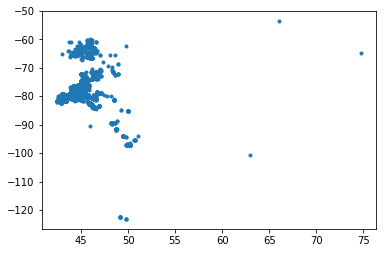

In [37]:
import mplleaflet
plt.scatter(base["lat"], base["lng"], marker=".")

## Convertendo Lontitude e Latitude para Rad

In [38]:
base['lat'] = base['lat']*np.pi/180
base['lng'] = base['lng']*np.pi/180
dadosEstacao['lat'] = dadosEstacao['lat']*np.pi/180
dadosEstacao['lng'] = dadosEstacao['lng']*np.pi/180

In [39]:
base.head()

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,20110410,0.858348,-2.137501,0.0,47.0,0.0,NE,66.0,0.0,6.0,...,8.0,30.00,29.87,46.0,43.0,97.0,6.0,51.0,44.0,42.0
1,20060404,0.868859,-2.149091,0.0,52.0,0.0,NW,41.0,0.0,9.0,...,11.0,29.92,29.74,326.0,43.0,100.0,4.0,63.0,48.0,38.0
2,20040402,0.868859,-2.149091,0.0,50.0,0.0,North,19.0,0.0,4.0,...,10.0,30.48,30.06,4.0,32.0,96.0,0.0,69.0,39.0,25.0
3,20050410,0.868859,-2.149091,0.0,42.0,0.0,NE,58.0,0.0,6.0,...,6.0,30.22,29.85,52.0,39.0,100.0,2.0,49.0,43.0,35.0
4,20110413,0.858348,-2.137501,0.0,45.0,0.0,NE,62.0,0.0,6.0,...,7.0,30.03,29.89,41.0,40.0,94.0,4.0,50.0,43.0,38.0


## Convertendo Object a Numérico

In [40]:
objects = []
for c in base.columns:
    if (base[c].dtype == 'object'):
        objects.append(c)
objects

['meanwdire', 'precipi', 'precipsource', 'precipm']

### meanwdire

In [41]:
set(base['meanwdire'])

{nan,
 'ENE',
 'ESE',
 'East',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'North',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'South',
 'Variable',
 'WNW',
 'WSW',
 'West'}

In [42]:
base['meanwdire'].replace({'ENE':0,'ESE':1,'East':2,'NE':3,'NNE':3,'NNW':4,'NW':5,'North':6,'SE':7,'SSE':8,'SSW':9,'SW':10,'SW':11,'South':11,'Variable':12,'WNW':13,'WSW':14,'West':15},inplace=True)

In [43]:
set(base['meanwdire'])

{0.0,
 nan,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

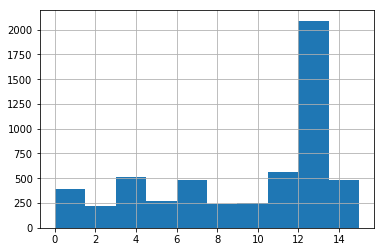

In [44]:
base['meanwdire'].hist()

In [45]:
base['meanwdire'].fillna(12, inplace=True)

In [46]:
base['meanwdire'].count()

6310

In [47]:
base.shape

(6310, 43)

### precipsource

In [48]:
set(base['precipsource'])

{nan, '3Or6HourObs', 'HourlyObs', 'Precip24Synop', 'Precip6GroupSynop'}

In [49]:
base['precipsource'].replace({'3Or6HourObs':0,'HourlyObs':1,'Precip24Synop':2,'Precip6GroupSynop':3},inplace=True)

In [50]:
set(base['precipsource'])

{0.0,
 1.0,
 2.0,
 3.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [51]:
base['precipsource'].count()

5513

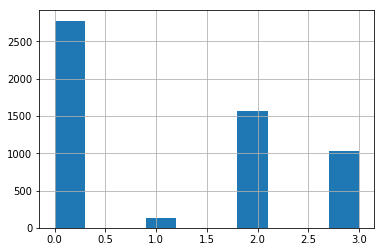

In [52]:
base['precipsource'].hist()

In [53]:
base['precipsource'].fillna(0,inplace=True)

In [54]:
base['precipsource'].count()

6310

### precipi

In [55]:
set(base['precipi'])

{nan,
 '0.00',
 '0.01',
 '0.02',
 '0.03',
 '0.04',
 '0.05',
 '0.06',
 '0.07',
 '0.08',
 '0.09',
 '0.10',
 '0.11',
 '0.12',
 '0.14',
 '0.15',
 '0.16',
 '0.17',
 '0.18',
 '0.19',
 '0.20',
 '0.21',
 '0.22',
 '0.24',
 '0.25',
 '0.26',
 '0.27',
 '0.28',
 '0.29',
 '0.30',
 '0.31',
 '0.32',
 '0.33',
 '0.34',
 '0.35',
 '0.36',
 '0.38',
 '0.39',
 '0.40',
 '0.42',
 '0.43',
 '0.44',
 '0.45',
 '0.46',
 '0.47',
 '0.48',
 '0.50',
 '0.51',
 '0.53',
 '0.55',
 '0.56',
 '0.57',
 '0.58',
 '0.59',
 '0.60',
 '0.61',
 '0.62',
 '0.63',
 '0.66',
 '0.67',
 '0.71',
 '0.72',
 '0.79',
 '0.83',
 '0.85',
 '0.86',
 '0.87',
 '0.89',
 '0.90',
 '0.91',
 '0.94',
 '0.96',
 '0.98',
 '1.04',
 '1.06',
 '1.10',
 '1.17',
 '1.18',
 '1.26',
 '1.38',
 '1.48',
 '1.60',
 '2.76',
 '3.24',
 '3.94',
 '5.59',
 'T'}

In [56]:
base['precipi'].replace({'T':6},inplace=True)

In [57]:
set(base['precipi'])

{nan,
 6,
 '0.00',
 '0.01',
 '0.02',
 '0.03',
 '0.04',
 '0.05',
 '0.06',
 '0.07',
 '0.08',
 '0.09',
 '0.10',
 '0.11',
 '0.12',
 '0.14',
 '0.15',
 '0.16',
 '0.17',
 '0.18',
 '0.19',
 '0.20',
 '0.21',
 '0.22',
 '0.24',
 '0.25',
 '0.26',
 '0.27',
 '0.28',
 '0.29',
 '0.30',
 '0.31',
 '0.32',
 '0.33',
 '0.34',
 '0.35',
 '0.36',
 '0.38',
 '0.39',
 '0.40',
 '0.42',
 '0.43',
 '0.44',
 '0.45',
 '0.46',
 '0.47',
 '0.48',
 '0.50',
 '0.51',
 '0.53',
 '0.55',
 '0.56',
 '0.57',
 '0.58',
 '0.59',
 '0.60',
 '0.61',
 '0.62',
 '0.63',
 '0.66',
 '0.67',
 '0.71',
 '0.72',
 '0.79',
 '0.83',
 '0.85',
 '0.86',
 '0.87',
 '0.89',
 '0.90',
 '0.91',
 '0.94',
 '0.96',
 '0.98',
 '1.04',
 '1.06',
 '1.10',
 '1.17',
 '1.18',
 '1.26',
 '1.38',
 '1.48',
 '1.60',
 '2.76',
 '3.24',
 '3.94',
 '5.59'}

In [58]:
base['precipi'] = base['precipi'].astype('float')

In [59]:
set(base['precipi'])

{0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.14,
 0.6,
 0.67,
 1.17,
 6.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.79,
 0.89,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.53,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.42,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.21,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.15,
 nan,
 nan,
 1.1,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.26,
 0.51,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.44,
 nan,
 nan,
 nan,
 0.09,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.22,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.46,
 nan,
 nan,
 0.16,
 nan,
 nan,
 nan,
 nan,
 0.63,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.28,
 nan,
 nan,
 nan,
 nan,
 0.62,
 nan,
 0.72,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 n

In [60]:
base['precipi'].count()

5722

In [61]:
base['precipi'].fillna(base['precipi'].mean(),inplace=True)

In [62]:
base['precipi'].count()

6310

### precipm

In [63]:
set(base['precipm'])

{nan,
 '0.0',
 '0.00',
 '0.1',
 '0.2',
 '0.25',
 '0.3',
 '0.4',
 '0.5',
 '0.51',
 '0.6',
 '0.7',
 '0.76',
 '0.8',
 '0.9',
 '1.0',
 '1.02',
 '1.2',
 '1.3',
 '1.5',
 '1.52',
 '1.78',
 '1.8',
 '10.0',
 '10.2',
 '10.67',
 '10.7',
 '100.0',
 '11.0',
 '11.18',
 '11.4',
 '11.43',
 '11.68',
 '12.0',
 '12.2',
 '12.7',
 '12.70',
 '13.0',
 '13.46',
 '13.5',
 '14.0',
 '14.2',
 '14.48',
 '141.99',
 '15.0',
 '15.2',
 '15.5',
 '15.8',
 '16.0',
 '16.76',
 '17.0',
 '18.0',
 '18.3',
 '2.0',
 '2.03',
 '2.2',
 '2.29',
 '2.3',
 '2.5',
 '2.79',
 '2.8',
 '20.0',
 '21.0',
 '21.6',
 '22.0',
 '22.6',
 '22.86',
 '23.0',
 '24.0',
 '24.38',
 '25.0',
 '26.42',
 '27.0',
 '28.0',
 '29.7',
 '29.97',
 '3.0',
 '3.1',
 '3.56',
 '3.6',
 '3.8',
 '32.0',
 '35.0',
 '37.59',
 '37.6',
 '4.0',
 '4.1',
 '4.5',
 '4.57',
 '4.6',
 '4.8',
 '4.83',
 '40.6',
 '5.0',
 '5.08',
 '5.1',
 '5.33',
 '5.59',
 '6.0',
 '6.1',
 '6.10',
 '6.3',
 '6.60',
 '6.8',
 '6.9',
 '7.0',
 '7.1',
 '7.11',
 '7.3',
 '7.37',
 '7.6',
 '7.62',
 '70.0',
 '8.0',
 '

In [64]:
base['precipm'].replace({'T': 10},inplace=True)

In [65]:
set(base['precipm'])

{nan,
 10,
 '0.0',
 '0.00',
 '0.1',
 '0.2',
 '0.25',
 '0.3',
 '0.4',
 '0.5',
 '0.51',
 '0.6',
 '0.7',
 '0.76',
 '0.8',
 '0.9',
 '1.0',
 '1.02',
 '1.2',
 '1.3',
 '1.5',
 '1.52',
 '1.78',
 '1.8',
 '10.0',
 '10.2',
 '10.67',
 '10.7',
 '100.0',
 '11.0',
 '11.18',
 '11.4',
 '11.43',
 '11.68',
 '12.0',
 '12.2',
 '12.7',
 '12.70',
 '13.0',
 '13.46',
 '13.5',
 '14.0',
 '14.2',
 '14.48',
 '141.99',
 '15.0',
 '15.2',
 '15.5',
 '15.8',
 '16.0',
 '16.76',
 '17.0',
 '18.0',
 '18.3',
 '2.0',
 '2.03',
 '2.2',
 '2.29',
 '2.3',
 '2.5',
 '2.79',
 '2.8',
 '20.0',
 '21.0',
 '21.6',
 '22.0',
 '22.6',
 '22.86',
 '23.0',
 '24.0',
 '24.38',
 '25.0',
 '26.42',
 '27.0',
 '28.0',
 '29.7',
 '29.97',
 '3.0',
 '3.1',
 '3.56',
 '3.6',
 '3.8',
 '32.0',
 '35.0',
 '37.59',
 '37.6',
 '4.0',
 '4.1',
 '4.5',
 '4.57',
 '4.6',
 '4.8',
 '4.83',
 '40.6',
 '5.0',
 '5.08',
 '5.1',
 '5.33',
 '5.59',
 '6.0',
 '6.1',
 '6.10',
 '6.3',
 '6.60',
 '6.8',
 '6.9',
 '7.0',
 '7.1',
 '7.11',
 '7.3',
 '7.37',
 '7.6',
 '7.62',
 '70.0',
 '8.0

In [66]:
base['precipm'] = base['precipm'].astype("float")

In [67]:
base['precipm'].count()

5722

In [68]:
base['precipm'].fillna(base['precipm'].mean(),inplace=True)

In [69]:
base['precipm'].count()

6310

## Criando base usando as estações do ano

In [70]:
primavera = base.loc[(base['date']%1000<=620) & (base['date']%1000>=320)]
primavera['date'] = "0" #Primavera
verao = base.loc[(base['date']%1000<=921) & (base['date']%1000>=621)]
verao['date'] = "1" #Verão
outono = base.loc[(base['date']%1000<=1220) & (base['date']%1000>=922)]
outono['date'] = "2" #Outono
inverno = base.loc[(base['date']%1000<=1221) & (base['date']%1000>=319)]
inverno['date'] = "3" #Inverno
frames = [primavera,verao,outono,inverno]
dadosEstacao = pd.concat(frames)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [71]:
dadosEstacao

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,0,0.858348,-2.137501,0.0,47.0,0.0,3.0,66.0,0.0,6.0,...,8.0,30.00,29.87,46.0,43.0,97.0,6.0,51.0,44.0,42.0
1,0,0.868859,-2.149091,0.0,52.0,0.0,5.0,41.0,0.0,9.0,...,11.0,29.92,29.74,326.0,43.0,100.0,4.0,63.0,48.0,38.0
2,0,0.868859,-2.149091,0.0,50.0,0.0,6.0,19.0,0.0,4.0,...,10.0,30.48,30.06,4.0,32.0,96.0,0.0,69.0,39.0,25.0
3,0,0.868859,-2.149091,0.0,42.0,0.0,3.0,58.0,0.0,6.0,...,6.0,30.22,29.85,52.0,39.0,100.0,2.0,49.0,43.0,35.0
4,0,0.858348,-2.137501,0.0,45.0,0.0,3.0,62.0,0.0,6.0,...,7.0,30.03,29.89,41.0,40.0,94.0,4.0,50.0,43.0,38.0
5,0,0.858348,-2.137501,0.0,41.0,0.0,3.0,31.0,0.0,4.0,...,5.0,30.24,30.00,44.0,33.0,100.0,-1.0,52.0,39.0,26.0
6,0,0.858348,-2.137501,0.0,48.0,0.0,13.0,12.0,0.0,3.0,...,9.0,30.08,29.81,289.0,32.0,98.0,0.0,65.0,37.0,25.0
7,0,0.858348,-2.137501,0.0,47.0,0.0,3.0,66.0,0.0,6.0,...,8.0,30.00,29.87,46.0,43.0,97.0,6.0,51.0,44.0,42.0
8,0,0.858348,-2.137501,0.0,44.0,0.0,2.0,28.0,0.0,4.0,...,7.0,30.29,29.98,83.0,34.0,96.0,1.0,55.0,39.0,29.0
10,0,0.815134,-1.118828,0.0,22.0,0.0,11.0,29.0,0.0,-5.0,...,-5.0,30.54,30.39,175.0,13.0,78.0,-10.0,31.0,23.0,2.0


## Atualizando a Data para somente o mês

In [72]:
base

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,20110410,0.858348,-2.137501,0.0,47.0,0.0,3.0,66.0,0.0,6.0,...,8.0,30.00,29.87,46.0,43.0,97.0,6.0,51.0,44.0,42.0
1,20060404,0.868859,-2.149091,0.0,52.0,0.0,5.0,41.0,0.0,9.0,...,11.0,29.92,29.74,326.0,43.0,100.0,4.0,63.0,48.0,38.0
2,20040402,0.868859,-2.149091,0.0,50.0,0.0,6.0,19.0,0.0,4.0,...,10.0,30.48,30.06,4.0,32.0,96.0,0.0,69.0,39.0,25.0
3,20050410,0.868859,-2.149091,0.0,42.0,0.0,3.0,58.0,0.0,6.0,...,6.0,30.22,29.85,52.0,39.0,100.0,2.0,49.0,43.0,35.0
4,20110413,0.858348,-2.137501,0.0,45.0,0.0,3.0,62.0,0.0,6.0,...,7.0,30.03,29.89,41.0,40.0,94.0,4.0,50.0,43.0,38.0
5,20110415,0.858348,-2.137501,0.0,41.0,0.0,3.0,31.0,0.0,4.0,...,5.0,30.24,30.00,44.0,33.0,100.0,-1.0,52.0,39.0,26.0
6,20110423,0.858348,-2.137501,0.0,48.0,0.0,13.0,12.0,0.0,3.0,...,9.0,30.08,29.81,289.0,32.0,98.0,0.0,65.0,37.0,25.0
7,20110410,0.858348,-2.137501,0.0,47.0,0.0,3.0,66.0,0.0,6.0,...,8.0,30.00,29.87,46.0,43.0,97.0,6.0,51.0,44.0,42.0
8,20110412,0.858348,-2.137501,0.0,44.0,0.0,2.0,28.0,0.0,4.0,...,7.0,30.29,29.98,83.0,34.0,96.0,1.0,55.0,39.0,29.0
9,20050712,0.807592,-1.097005,0.0,57.0,0.0,6.0,82.0,0.0,14.0,...,14.0,30.06,29.95,11.0,56.0,100.0,13.0,59.0,57.0,55.0


In [73]:
base['date'] = (base['date']//100)%100

In [74]:
base

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,4,0.858348,-2.137501,0.0,47.0,0.0,3.0,66.0,0.0,6.0,...,8.0,30.00,29.87,46.0,43.0,97.0,6.0,51.0,44.0,42.0
1,4,0.868859,-2.149091,0.0,52.0,0.0,5.0,41.0,0.0,9.0,...,11.0,29.92,29.74,326.0,43.0,100.0,4.0,63.0,48.0,38.0
2,4,0.868859,-2.149091,0.0,50.0,0.0,6.0,19.0,0.0,4.0,...,10.0,30.48,30.06,4.0,32.0,96.0,0.0,69.0,39.0,25.0
3,4,0.868859,-2.149091,0.0,42.0,0.0,3.0,58.0,0.0,6.0,...,6.0,30.22,29.85,52.0,39.0,100.0,2.0,49.0,43.0,35.0
4,4,0.858348,-2.137501,0.0,45.0,0.0,3.0,62.0,0.0,6.0,...,7.0,30.03,29.89,41.0,40.0,94.0,4.0,50.0,43.0,38.0
5,4,0.858348,-2.137501,0.0,41.0,0.0,3.0,31.0,0.0,4.0,...,5.0,30.24,30.00,44.0,33.0,100.0,-1.0,52.0,39.0,26.0
6,4,0.858348,-2.137501,0.0,48.0,0.0,13.0,12.0,0.0,3.0,...,9.0,30.08,29.81,289.0,32.0,98.0,0.0,65.0,37.0,25.0
7,4,0.858348,-2.137501,0.0,47.0,0.0,3.0,66.0,0.0,6.0,...,8.0,30.00,29.87,46.0,43.0,97.0,6.0,51.0,44.0,42.0
8,4,0.858348,-2.137501,0.0,44.0,0.0,2.0,28.0,0.0,4.0,...,7.0,30.29,29.98,83.0,34.0,96.0,1.0,55.0,39.0,29.0
9,7,0.807592,-1.097005,0.0,57.0,0.0,6.0,82.0,0.0,14.0,...,14.0,30.06,29.95,11.0,56.0,100.0,13.0,59.0,57.0,55.0


## Padronizando com MinMaxScaler

In [75]:
padraoMes = MinMaxScaler().fit_transform(base)
padraoEstacao = MinMaxScaler().fit_transform(dadosEstacao)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [76]:
padraoMes

array([[0.3       , 0.2085366 , 0.00954914, ..., 0.55434783, 0.60714286,
        0.74766355],
       [0.3       , 0.22715759, 0.        , ..., 0.68478261, 0.6547619 ,
        0.71028037],
       [0.3       , 0.22715759, 0.        , ..., 0.75      , 0.54761905,
        0.58878505],
       ...,
       [0.4       , 0.08590734, 0.72900404, ..., 0.43478261, 0.5       ,
        0.6635514 ],
       [0.4       , 0.08590734, 0.72900404, ..., 0.44565217, 0.51190476,
        0.6635514 ],
       [0.5       , 0.08590734, 0.72900404, ..., 0.57608696, 0.5952381 ,
        0.68224299]])

In [78]:
padraoEstacao

array([[0.        , 0.20789538, 0.00954914, ..., 0.54945055, 0.60240964,
        0.69662921],
       [0.        , 0.22653146, 0.        , ..., 0.68131868, 0.65060241,
        0.65168539],
       [0.        , 0.22653146, 0.        , ..., 0.74725275, 0.54216867,
        0.50561798],
       ...,
       [1.        , 0.08516677, 0.72900404, ..., 0.42857143, 0.4939759 ,
        0.59550562],
       [1.        , 0.08516677, 0.72900404, ..., 0.43956044, 0.5060241 ,
        0.59550562],
       [1.        , 0.08516677, 0.72900404, ..., 0.57142857, 0.59036145,
        0.61797753]])